
# Project: Investigate a TMDB - Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movie Database (TMDb) is a community built movie and TV database.This data set contains information about number of movies collected from The Movie Database (TMDb), including user ratings and revenue. This allows us to explore more about the movies and and answer many questions like What can we say about the success of a movie before it is released? Are there certain companies that have found a consistent formula? 

>In this project, We will perform an exploratory analysis on a TMDb dataset, We will compare the data for movies which is defined with respect to various parameters and find appropriate conclusion from it.

### Posing Questions : 
> Here are some of the questions which can be used for analysis:
 1. Is releasing movie on weekends helps grossing higher revenue ?
 2. Which cast is the most famous over the year?
 3. Which cast has the highest grossing movies on average?
 4. Which genre is most popular over the years? 


In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd #for creating arrays and data containers for further operations
import numpy as np  #for importing the dataset and manipulations of data
import matplotlib.pyplot as plt  #for creating various visuals
import seaborn as sns #for decorating plots and creating advanced visuals such as heatmaps
sns.set(style='white')
from datetime import datetime #for converting variables into datetime format
 #for rendering visualzations in notebook
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [11]:
# Load your data and print out a few lines. Perform operations to inspect data
#types and look for instances of missing or possibly errant data.
df = pd.read_csv('C:\\Users\\infom\\Downloads\\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
# Print the last few records to review data and format
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


**Note** : Some values from Budget and Revenue column are missing and are represented as '0', also some character values from homepage and cast are missing So based on a questions we posed the missing values from budget and revenues will affect the answers so will deal with them one by one. So first with the 'revenue' columns.


### Data Cleaning 

From the data description and questions to answer, I've determined that some dataset columns will not play a part in my analysis and these columns can therefore be removed. This will decluster the dataset and also help with processing performance of the dataset.So I'll take a 3 step approach to data cleanup -
 - Delete the unnecessary columns
 - Find the missing values
 - Fix missing and data format issues

In [13]:
del df['homepage']
del df['revenue_adj']
del df['budget_adj']
del df['keywords']
del df['production_companies']
del df['tagline']
del df['overview']

In [14]:
df.shape

(10866, 14)

In [15]:
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [16]:
df.dropna(subset = ['director'], inplace = True)

From the output we can see that there are null values present in the imdb_id, cast, director, genres columns. But these values are not going to affect our analysis so will keep them as it is.

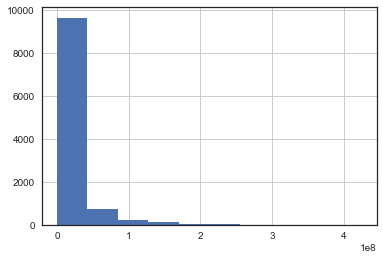

In [17]:
(df['budget']).hist();

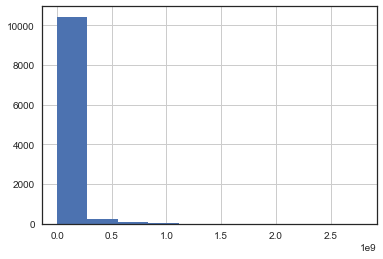

In [18]:
(df['revenue']).hist();

As we can see that values in the budget and the revenue column are normally distributed so we can fill the missing values with mean because that's where most values would be distributed around.

In [6]:
mean_budget = df['budget'].mean()
df['budget'] = df['budget'].replace(0,mean_budget) #replaced the values equal to zero with mean
np.log(df['budget']) #log() function is ussed to convert the scientific notation values in a compatible values

0        18.826146
1        18.826146
2        18.515991
3        19.113828
4        19.062535
5        18.720785
6        18.858936
7        18.497642
8        18.119576
9        18.980297
10       19.316769
11       18.985995
12       16.523561
13       18.292847
14       19.450300
15       17.599700
16       17.686712
17       18.683045
18       18.369387
19       18.890684
20       19.062535
21       17.216708
22       18.515991
23       17.504390
24       17.147715
25       18.826146
26       18.035018
27       18.209960
28       16.811243
29       17.926384
           ...    
10836    16.502269
10837    16.502269
10838    16.502269
10839    16.502269
10840    16.502269
10841    11.225243
10842    16.502269
10843    16.502269
10844    16.502269
10845    16.502269
10846    16.502269
10847    16.502269
10848    15.447688
10849    16.502269
10850    16.502269
10851    16.502269
10852    16.502269
10853    16.502269
10854    16.502269
10855    13.458836
10856    16.502269
10857    16.

In [19]:
mean_revenue = df['revenue'].mean()
df['revenue'] = df['revenue'].replace(0,mean_revenue) #replaced the values equal to zero with mean
np.log(df['revenue'])  #log() function is ussed to convert the scientific notation values in a compatible values

0        21.137710
1        19.751558
2        19.503293
3        21.449934
4        21.132889
5        20.093939
6        19.903656
7        20.204711
8        20.868864
9        20.565100
10       20.596199
11       19.030380
12       17.422893
13       19.311190
14       21.063329
15       18.863828
16       19.601707
17       20.066648
18       20.111425
19       20.293288
20       19.158015
21       18.334140
22       19.969287
23       20.160535
24       18.708462
25       20.341024
26       19.190157
27       19.816436
28       18.296777
29       19.556129
           ...    
10836    17.503995
10837    17.503995
10838    17.503995
10839    17.503995
10840    17.503995
10841    17.503995
10842    17.503995
10843    17.503995
10844    17.503995
10845    17.503995
10846    17.503995
10847    17.503995
10848    16.300417
10849    17.503995
10850    17.503995
10851    17.503995
10852    17.503995
10853    17.503995
10854    17.503995
10855    17.503995
10856    17.503995
10857    17.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you've trimmed and cleaned your data, we're ready to move on to exploration. We will Compute statistics and create visualizations with the goal of addressing the research questions. 

### Question 1 : How are the genres distributed and how do we visualize this?

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
ss = df['genres'].str.split('|')

sf = pd.DataFrame({'title':df['original_title'],'revenue': df['revenue'],'budget':df['budget'], 'genre':ss, 'profit': (df['revenue']-df['budget']), 'votes':df['vote_count']}) 
sf.head(3)

,budget,genre,profit,revenue,title,votes
0,150000000,"[Action, Adventure, Science Fiction, Thriller]",1.363529e+09,1.513529e+09,Jurassic World,5562
1,150000000,"[Action, Adventure, Science Fiction, Thriller]",2.284364e+08,3.784364e+08,Mad Max: Fury Road,6185
2,110000000,"[Adventure, Science Fiction, Thriller]",1.852382e+08,2.952382e+08,Insurgent,2480


To store unique genres we created a Set, so that we can perform ooperations on it.

In [21]:
genreSet = set()
for item in sf.genre.dropna():
        for genre in item:
            genreSet.add(genre)
print(genreSet)

{'War', 'Science Fiction', 'Horror', 'Thriller', 'TV Movie', 'Music', 'Western', 'Foreign', 'Family', 'Animation', 'Comedy', 'Mystery', 'History', 'Documentary', 'Fantasy', 'Crime', 'Action', 'Romance', 'Drama', 'Adventure'}


Now we will create a Dataframe with movie title representing there genres 

In [22]:
sf = sf[pd.notnull(sf['genre'])].copy()
for genre in genreSet:
    sf[genre] = sf['genre'].apply(lambda x: genre in x)
sf


,budget,genre,profit,revenue,title,votes,War,Science Fiction,Horror,Thriller,...,Comedy,Mystery,History,Documentary,Fantasy,Crime,Action,Romance,Drama,Adventure
0,150000000,"[Action, Adventure, Science Fiction, Thriller]",1.363529e+09,1.513529e+09,Jurassic World,5562,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True
1,150000000,"[Action, Adventure, Science Fiction, Thriller]",2.284364e+08,3.784364e+08,Mad Max: Fury Road,6185,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True
2,110000000,"[Adventure, Science Fiction, Thriller]",1.852382e+08,2.952382e+08,Insurgent,2480,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
3,200000000,"[Action, Adventure, Science Fiction, Fantasy]",1.868178e+09,2.068178e+09,Star Wars: The Force Awakens,5292,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
4,190000000,"[Action, Crime, Thriller]",1.316249e+09,1.506249e+09,Furious 7,2947,False,False,False,True,...,False,False,False,False,False,True,True,False,False,False
5,135000000,"[Western, Drama, Adventure, Thriller]",3.979505e+08,5.329505e+08,The Revenant,3929,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
6,155000000,"[Science Fiction, Action, Thriller, Adventure]",2.856035e+08,4.406035e+08,Terminator Genisys,2598,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True
7,108000000,"[Drama, Adventure, Science Fiction]",4.873803e+08,5.953803e+08,The Martian,4572,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
8,74000000,"[Family, Animation, Adventure, Comedy]",1.082731e+09,1.156731e+09,Minions,2893,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
9,175000000,"[Comedy, Animation, Family]",6.787086e+08,8.537086e+08,Inside Out,3935,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [23]:
sf[['Comedy','Music','Western','Thriller','Romance','Mystery','Foreign','Family','Horror','Crime','Action','Science Fiction','TV Movie','Documentary','Fantasy','Drama','Adventure','War','History','Animation']] = (sf[['Comedy','Music','Western','Thriller','Romance','Mystery','Foreign','Family','Horror','Crime','Action','Science Fiction','TV Movie','Documentary','Fantasy','Drama','Adventure','War','History','Animation']] == True).astype(int)
sf.head()   # Mapped the true and false value to  0 and 1 

,budget,genre,profit,revenue,title,votes,War,Science Fiction,Horror,Thriller,...,Comedy,Mystery,History,Documentary,Fantasy,Crime,Action,Romance,Drama,Adventure
0,150000000,"[Action, Adventure, Science Fiction, Thriller]",1.363529e+09,1.513529e+09,Jurassic World,5562,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
1,150000000,"[Action, Adventure, Science Fiction, Thriller]",2.284364e+08,3.784364e+08,Mad Max: Fury Road,6185,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,110000000,"[Adventure, Science Fiction, Thriller]",1.852382e+08,2.952382e+08,Insurgent,2480,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,200000000,"[Action, Adventure, Science Fiction, Fantasy]",1.868178e+09,2.068178e+09,Star Wars: The Force Awakens,5292,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
4,190000000,"[Action, Crime, Thriller]",1.316249e+09,1.506249e+09,Furious 7,2947,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


To Visualize the data will represent the data in Pie chart, Which can help us get a good overview of Data.

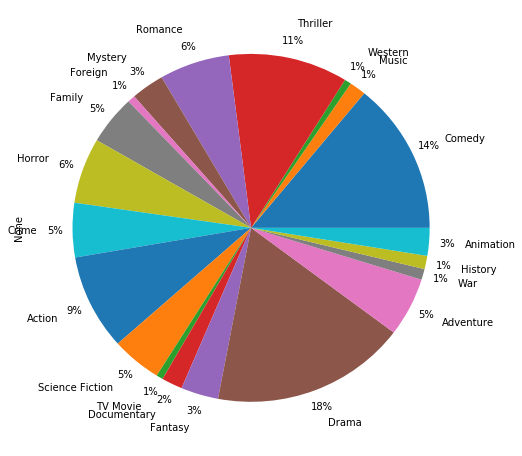

In [16]:
(sf[['Comedy','Music','Western','Thriller','Romance','Mystery','Foreign','Family','Horror','Crime','Action','Science Fiction','TV Movie','Documentary','Fantasy','Drama','Adventure','War','History','Animation']]==1).sum().plot.pie(figsize = (8,8),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);  

### Q.2 Relationship between Revenue, Budget and Popularity

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df_budget = pd.Series(np.array(df['budget']),index = df['id'])     #Creating a new series with budget 
df_budget.head(3)

id
135397    150000000
76341     150000000
262500    110000000
dtype: int64

In [25]:
df_revenue = pd.Series(np.array(df['revenue']),index = df['id'])   #Creating a new Data Series with revenue
df_revenue.head(3)

id
135397    1.513529e+09
76341     3.784364e+08
262500    2.952382e+08
dtype: float64

In [26]:
ff = pd.concat([df_budget,df_revenue], axis = 1)     #Merging the budget and revenue series
ff.head(3)

,0,1
id,,
135397,150000000,1.513529e+09
76341,150000000,3.784364e+08
262500,110000000,2.952382e+08


In [27]:
pop_df = pd.Series(np.array(df['popularity']),index = df['id'])    #Creating a Data Series 
pop_df.head(3)

id
135397    32.985763
76341     28.419936
262500    13.112507
dtype: float64

In [28]:
final = pd.concat([ff,pop_df], axis=1)    #Merging all the Data Series
final.columns = ['a','b','c']
final.head(3)

,a,b,c
id,,,
135397,150000000,1.513529e+09,32.985763
76341,150000000,3.784364e+08,28.419936
262500,110000000,2.952382e+08,13.112507


In [29]:
final['a'].corr(final['c'])  #Calculating Pearson's Coefficient which outputs the positive correlation value 

0.54504834084414022

In [30]:
final['b'].corr(final['c'])

0.63511337942064106

From the above generated values of correlation between budget and revenue with popularity explains that there is a positive correlation between them so when budget and revenue will be high the popularity too will be high! We can interpret the same from the following visualizations.

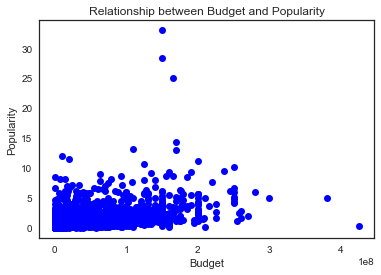

In [31]:
fig, ax1 = plt.subplots()
x = final['a']
y = final['c']
ax1.plot(x, y,'bo')
ax1.set_title('Relationship between Budget and Popularity')
ax1.set_xlabel('Budget')
ax1.set_ylabel('Popularity')
plt.show()

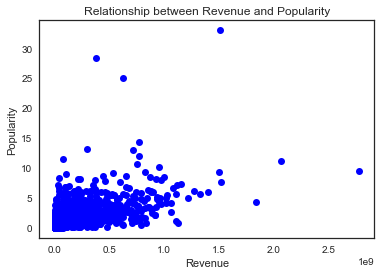

In [32]:
fig, ax1 = plt.subplots()
x = final['b']
y = final['c']
ax1.plot(x, y,'bo')
ax1.set_title('Relationship between Revenue and Popularity')
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Popularity')
plt.show()

From the values calculated for the pearsons correlation coefficient we can conclude that there is very strong relation between budget, revenue and popularity. We can also visualize the same from the above generated plots  .

<a id='conclusions'></a>
## Conclusions

> So from the visualizatons generated with help of code we can conclude that the most famous movie genre is **Drama** , People are generally not in favour of the genres like TV, Movie Documentry, Foreign, Western, Music,History, War. We can also say that people enjoyed wathing movies with genres like Thrill and Comedy. Also from the visualization of second question we can say that there is a strong relationship between Budget popularity and revenue popularity i.e if you have higher budget then the movie may get hit and generate higher revenue. So these are some of the factors that directors and production companies can use to make their movie successfully and gain well! 

### Limitation
> The exploratory data analysis conducted in this report aims to answer questions based on descriptive calculation. Since no statistical tests were done, all results are tentative and cannot be used to predict population or draw statistical conclusions.